Este cuaderno incluye el código utilizado para el ejemplo: Eliminación de ruido de la sección 2.6.2 del documento.

# Módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.restoration import denoise_tv_chambolle
from skimage.util import random_noise
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

## Funciones auxiliares

In [2]:
def normalize(image):
    return (image - image.min()) / (image.max() - image.min())

# Eliminación de ruido

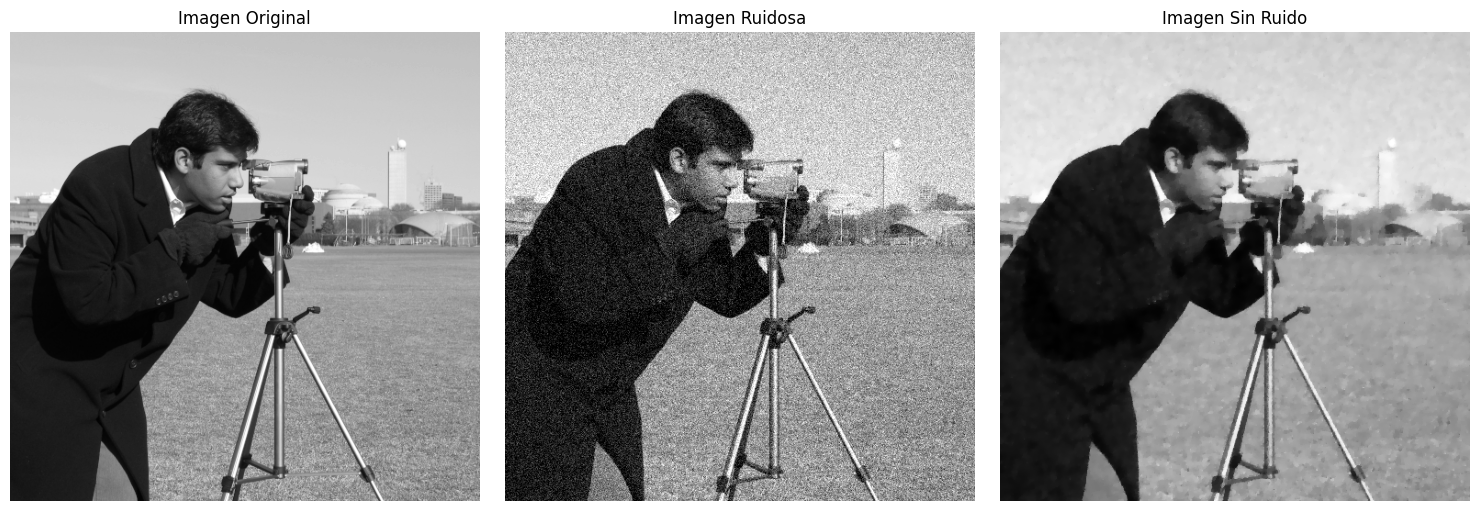

In [3]:
# Cargar imagen de ejemplo
imagen = data.camera()

# Añadir ruido a la imagen
imagen_ruidosa = random_noise(imagen, var=0.01)

# Realizar la eliminación de ruido de TV
imagen_denoised = denoise_tv_chambolle(imagen_ruidosa, weight=0.1)

# Mostrar resultados
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True)
ax[0].imshow(imagen, cmap="gray")
ax[0].set_title("Imagen Original")
ax[1].imshow(imagen_ruidosa, cmap="gray")
ax[1].set_title("Imagen Ruidosa")
ax[2].imshow(imagen_denoised, cmap="gray")
ax[2].set_title("Imagen Sin Ruido")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()

In [4]:
# calculamos las métricas entre la imágen original, la imagen ruidosa y la imagen sin ruido
ssim_ruidosa = structural_similarity(
    normalize(imagen), normalize(imagen_ruidosa), data_range=1
)
ssim_restaurada = structural_similarity(
    normalize(imagen), normalize(imagen_denoised), data_range=1
)
psnr_ruidosa = peak_signal_noise_ratio(
    normalize(imagen), normalize(imagen_ruidosa), data_range=1
)
psnr_restaurada = peak_signal_noise_ratio(
    normalize(imagen), normalize(imagen_denoised), data_range=1
)

print(f"SSIM entre la imagen original y la imagen ruidosa: {ssim_ruidosa}")
print(f"SSIM entre la imagen original y la imagen restaurada: {ssim_restaurada}")
print(f"PSNR entre la imagen original y la imagen ruidosa: {psnr_ruidosa}")
print(f"PSNR entre la imagen original y la imagen restaurada: {psnr_restaurada}")

SSIM entre la imagen original y la imagen ruidosa: 0.2959201540198985
SSIM entre la imagen original y la imagen restaurada: 0.7653400334594207
PSNR entre la imagen original y la imagen ruidosa: 20.440283317602187
PSNR entre la imagen original y la imagen restaurada: 26.222181204701776
